# CASE STUDY 

PHÂN TÍCH CÁC NHÂN TỐ ẢNH HƯỞNG TỚI GIÁ XE HƠI

Mô tả bài toán
Công ty ô tô Geely Auto của Trung Quốc muốn gia nhập thị trường Mỹ bằng cách thành lập
nhà máy sản xuất của họ ở Mỹ để tạo sức cạnh tranh với các đối thủ Mỹ và Châu âu tại thị
trường Mỹ. Công ty Geely Auto đã ký hợp đồng với một công ty tư vấn ôtô để tìm hiểu các
yếu tác động tới giá ô tô. Cụ thể họ muốn tìm hiểu các đặc điểm của một chiếc xe sẽ ảnh
hưởng tới việc định giá ô tô tại thị trường Mỹ, vì có thể thị hiếu của người tiêu dùng Mỹ có
điểm khác biệt so với người tiêu dùng ở Trung quốc. Công ty muốn biết:

- Có những thuộc tính nào có ý nghĩa trong việc định giá của một chiếc xe hơi
- Các thuộc tính đó có liên hệ với giá xe như thế nào

Dựa trên các cuộc khảo sát thị trường, công ty tư vấn đã thu thập một tập dữ liệu về các loại ô tô khác nhau trên thị trường Mỹ để phân tích.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr
from math import sqrt

## 1. Đọc dữ liệu

In [2]:
#Đọc dữ liệu
data= pd.read_csv('Case_study_CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Tạo bản sao dữ liệu
car=data.copy()

In [4]:
#Tạo cột brand từ CarName để nghiên cứu khả năng thương hiệu ảnh hưởng đến giá xe
car['brand']= car['CarName'].str.split().str[0]
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


## 2. Phân tích sơ bộ cấu trúc dữ liệu

In [5]:
#Cấu trúc dữ liệu
print(f'{car.info()}')
print(f'Tổng số lượng dữ liệu trùng lặp: {car.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#Thuộc tính doornumber (số lượng cửa) và cylindernumber (số lượng xi lanh đặt trong xe) đang được nhập dưới dạng chữ, kiểu dữ liệu object. Chuẩn hóa lại dữ liệu về dạng số.
#Chuẩn hóa cột doornumber
car['doornumber'].unique()
car['doornumber'].replace(['two', 'four'],[2,4], inplace=True)
car['doornumber'].unique()

array([2, 4], dtype=int64)

In [7]:
#Chuẩn hóa cột cylindernumber
car['cylindernumber'].unique()
car['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4, 6, 5, 3, 12, 2, 8], inplace=True)
car['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [8]:
# Phân tích sơ bộ dữ liệu
car.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


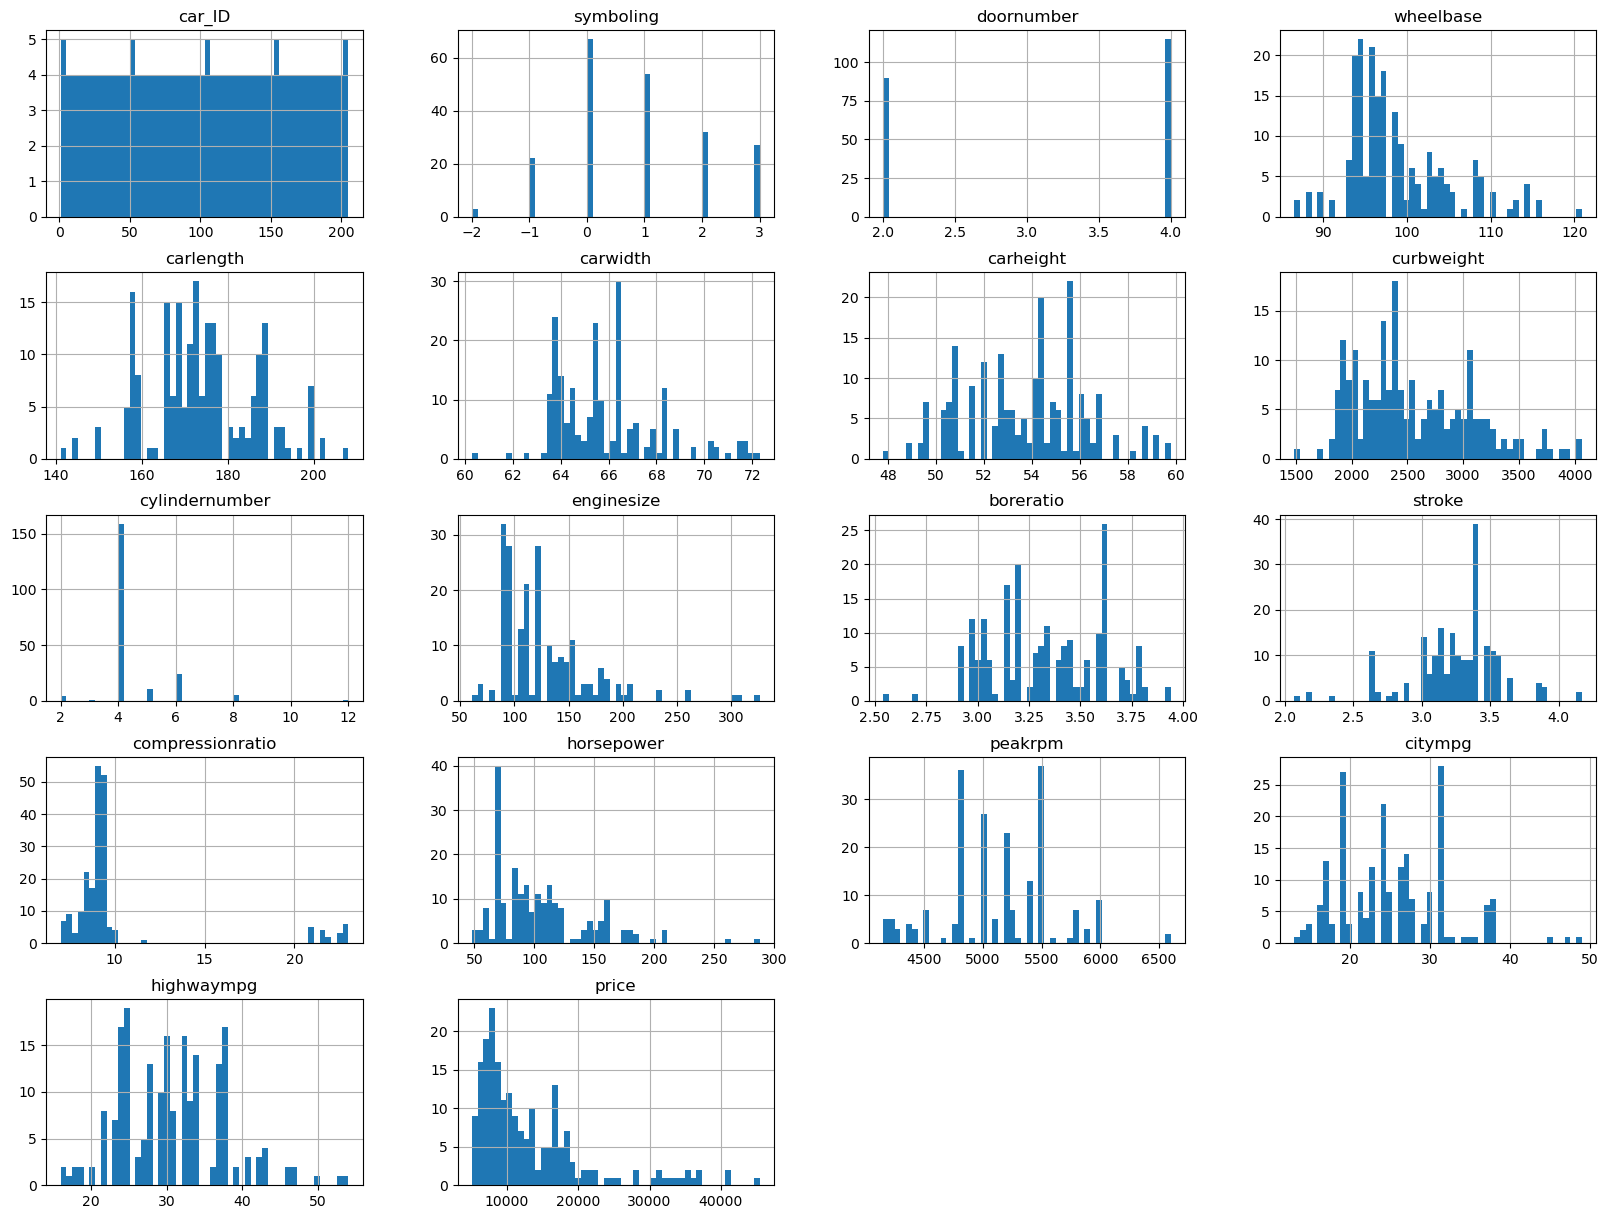

In [9]:
import matplotlib.pyplot as plt
car.hist(bins=50, figsize=(20,15))
plt.show()

Nhận xét: Tập dữ liệu đang thu thập gồm 25 yếu tố có thể ảnh hưởng tới giá xe hơi (26 cột, 205 dòng). 
 - Tất cả các cột đều ghi nhận đầy đủ 205 giá trị --> không có dữ liệu khuyết thiếu. 
 - Kiểm tra thông tin của tất cả các dòng không có dòng nào giống hệt nhau -> không có dữ liệu trùng lặp.
 - Dữ liệu một số thuộc tính định lượng có xu hướng phân bố lệch trái
 - Mean và Mod của các thuộc tính định lượng không có sự khác biệt quá lớn. Riêng giá xe có sự khác biệt tương đối.

## 3. Kiểm định mức tương quan giữa các thuộc tính và giá xe hơi

In [10]:
#Kiểm định tương quan giữa các thuộc tính định lượng và giá xe hơi
from scipy import  stats 
corr_matrix = car.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Nhận xét:
- 3 thuộc tính định lượng có mức tương quan (ảnh hường) lớn nhất tới giá xe hơi gồm: enginesize, curbweight và horsepower. 
- Ngoài ra 3 thuộc tính cần xem xét đưa vào mô hình: carwidth, cylindernumber, carlength.

In [11]:
#Kiểm định tương quan giữa thuộc tính định tính và giá xe hơi
# Sử dụng LabelEncodeing để mã hóa và hệ số corr để xem xét tương quan giữa hãng xe/ thân xe và giá xe sau đó so sánh với kết quả của kiểm định spearman
# Mã hóa hãng xe
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
car['brand_code'] = encoder.fit_transform(car['brand'].values)
car['carbody_code'] = encoder.fit_transform(car['carbody'].values)
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_code,carbody_code
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,2
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,2,3
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845.0,volvo,26,3
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045.0,volvo,26,3
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485.0,volvo,26,3
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470.0,volvo,26,3


In [12]:
#Xem xét tương quan giữa hãng xe, thân xe và giá xe sau khi mã hóa
corr_matrix = car.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
carbody_code       -0.083976
peakrpm            -0.085267
car_ID             -0.109093
brand_code         -0.231594
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [13]:
#Kiểm định tương quan giữa thuộc tính hãng xe/thân xe và giá xe hơi bằng Spearman
#Hãng xe và giá xe 
from scipy import  stats 
r, pvalue = stats.spearmanr(car['brand'],car['price'])
print('r =',r)
print('pvalue =',pvalue)


r = -0.06996569440946838
pvalue = 0.31883586766915756


In [14]:
#Thân xe và giá xe 
r, pvalue = stats.spearmanr(car['carbody'],car['price'])
print('r =',r)
print('pvalue =',pvalue)

r = 0.09178485959664219
pvalue = 0.19057227497525178


Nhận xét: 
- Việc mã hóa dữ liệu hãng xe bằng phương pháp LabelEncoding sau đó tính toán hệ số tương quan corr và sử dụng kiểm định Spearman đều cho kết quả mức tương quan thấp (Corr = -0.231439; pvalue = 0.32712 > alpha=0.05) -> Thuộc tính hãng xe có mức ảnh hưởng thấp đến giá xe. 
- Kết quả tương tự đối với thân xe và giá xe.

--> Sử dụng kiểm định Spearman cho tất cả các thuộc tính định tính

In [15]:
car.columns[car.dtypes=='object']

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem', 'brand'],
      dtype='object')

In [16]:
#Kiểm định spearman cho các thuộc tính định tính và giá xe hơi
car_qual=car[['CarName','fueltype','aspiration','carbody', 'drivewheel','enginelocation','enginetype','fuelsystem','brand','price']]
p=[]
for i in range(len(car_qual.columns)-1):
    r, pvalue = stats.spearmanr(car[car_qual.columns[i]],car_qual['price'])
    if pvalue < 0.05: p.append(f'{car_qual.columns[i]}:{pvalue}')
p

['fueltype:0.04568297411674289',
 'aspiration:6.5637546727367955e-06',
 'drivewheel:4.9537966157749595e-24',
 'enginelocation:0.005092262581381994',
 'fuelsystem:2.0468628898699014e-29']

Nhận xét: 03 thuộc tính định tính có khả năng ảnh hưởng lớn tới giá xe hơi (pvalue << alpha=0.05) bao gồm: aspiration, drivewheel và fuelsystem. -> Mã hóa dữ liệu các cột định tính để đưa vào mô hình.

--> Tổng hợp các yếu tố định tính và định lượng xem xét đưa vào mô hình gồm:
- Định lượng: enginesize, curbweight và horsepower, cân nhắc các yếu tố carwidth, cylindernumber và highwaympg nếu 03 biến định lượng có mức tương quan lớn với nhau/mô hình cho score thấp.
- Định tính: aspiration, drivewheel và fuelsystem


## 4. Lựa chọn các thuộc tính đưa vào mô hình

In [17]:
#Thuộc tính lựa chọn đưa vào mô hình căn cứ kết quả thử nghiệm kiểm định
df_car = car.loc[:,('aspiration','drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth', 'cylindernumber', 'highwaympg','price')]
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   drivewheel      205 non-null    object 
 2   fuelsystem      205 non-null    object 
 3   enginesize      205 non-null    int64  
 4   curbweight      205 non-null    int64  
 5   horsepower      205 non-null    int64  
 6   carwidth        205 non-null    float64
 7   cylindernumber  205 non-null    int64  
 8   highwaympg      205 non-null    int64  
 9   price           205 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 16.1+ KB


Mã hóa dữ liệu 3 thuộc tính định tính lựa chọn đưa vào mô hình; kiểm định lại tương quan giữa các thuộc tính

In [18]:
# Sử dụng Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_car['aspiration']=encoder.fit_transform(df_car['aspiration'])
df_car['drivewheel']=encoder.fit_transform(df_car['drivewheel'])
df_car['fuelsystem']=encoder.fit_transform(df_car['fuelsystem'])
df_car

,aspiration,drivewheel,fuelsystem,enginesize,curbweight,horsepower,carwidth,cylindernumber,highwaympg,price
0,0,2,5,130,2548,111,64.1,4,27,13495.0
1,0,2,5,130,2548,111,64.1,4,27,16500.0
2,0,2,5,152,2823,154,65.5,6,26,16500.0
3,0,1,5,109,2337,102,66.2,4,30,13950.0
4,0,0,5,136,2824,115,66.4,5,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,0,2,5,141,2952,114,68.9,4,28,16845.0
201,1,2,5,141,3049,160,68.8,4,25,19045.0
202,0,2,5,173,3012,134,68.9,6,23,21485.0
203,1,2,3,145,3217,106,68.9,6,27,22470.0


In [19]:
#Kiểm định lại mức tương quan giữa các thuộc tính sau mã hóa và giá xe
from scipy import  stats 
corr_matrix = df_car.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)

price             1.000000
enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
drivewheel        0.577992
fuelsystem        0.526823
aspiration        0.177926
highwaympg       -0.697599
Name: price, dtype: float64

In [20]:
#Bộ dữ liệu thử nghiệm 1. 
#Các thuộc tính lựa chọn gồm 4 thuộc tính định lượng và 1 thuộc tính định tính có tương quan lớn gồm: 
#'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower'
car1=df_car.loc[:,('drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','price')]
from sklearn.model_selection import train_test_split
train_set1, test_set1 = train_test_split(car1, test_size = 0.2, random_state=42)

In [21]:
#Kiểm định lại mức tương quan giữa các thuộc tính sau khi mã hóa
from scipy import  stats 
corr_matrix = train_set1.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)


price         1.000000
enginesize    0.866433
curbweight    0.824212
horsepower    0.810986
drivewheel    0.586441
fuelsystem    0.552034
Name: price, dtype: float64

<Axes: >

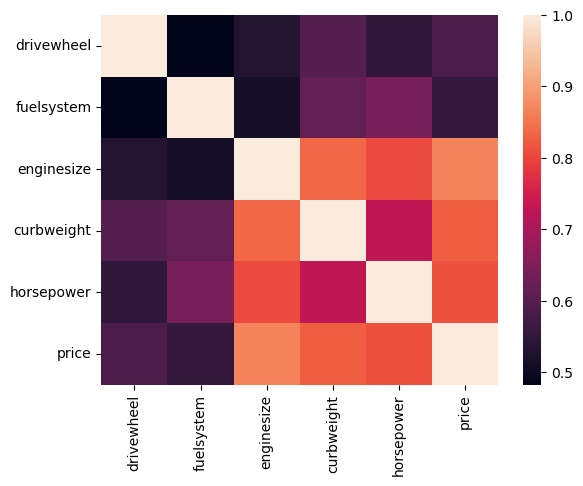

In [22]:
sns.heatmap(corr_matrix)

In [23]:
#Kiểm định tương quan giữa các thuộc tính
covar1=[]
for i in range(0,len(train_set1.columns)-1,1):
    for j in range(i,len(train_set1.columns)-1,1):
        if i==j:
            continue
        r_coef, pl = pearsonr(train_set1[train_set1.columns[i]], train_set1[train_set1.columns[j]])
        if abs(r_coef) >= 0.7:
            covar1.append(f'{train_set1.columns[i]} - {train_set1.columns[j]}: {r_coef}')
covar1

['enginesize - curbweight: 0.835858938076455',
 'enginesize - horsepower: 0.804452164061477',
 'curbweight - horsepower: 0.726686555598216']

In [24]:
Xtrain1=train_set1.iloc[:, :-1].values
Xtest1=test_set1.iloc[:, :-1].values
ytrain1=train_set1.iloc[:,-1]
ytest1=test_set1.iloc[:,-1]

In [25]:
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car1_model = LinearRegression()
car1_model.fit(Xtrain1, ytrain1.ravel())

LinearRegression()

In [26]:
#KQ mô hình
print(f'''The linear model is: \n price = {car1_model.intercept_} +\
      {car1_model.coef_[0]}*drivewheel + {car1_model.coef_[1]}*fuelsystem + 
      {car1_model.coef_[2]}*enginesize + {car1_model.coef_[3]}*curbweight +\
      {car1_model.coef_[4]}*horsepower''')

The linear model is: 
 price = -13153.1305233057 +      1167.3774033065897*drivewheel + -87.3631171953496*fuelsystem + 
      77.28686558971879*enginesize + 3.867642590341374*curbweight +      51.880107993888984*horsepower


In [27]:
car1_model.score(Xtrain1, ytrain1)

0.8149782696013206

In [28]:
car1_model.score(Xtest1, ytest1)

0.8353907001936591

Nhận xét: Điểm trên tập train và tập test chấp nhận được. Tuy nhiên các thuộc tính định lượng có hệ số tương quan cao.
-> loại bỏ thuộc tính horsepower để kiểm tra mức độ tác động đến mô hình.

In [29]:
#Bộ dữ liệu thử nghiệm 2. Các thuộc tính lựa chọn gồm: 'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth'
car2=df_car.loc[:,('drivewheel','fuelsystem', 'enginesize', 'curbweight','price')]
from sklearn.model_selection import train_test_split
train_set2, test_set2 = train_test_split(car2, test_size = 0.2, random_state=42)

In [30]:
from scipy import  stats 
corr_matrix = train_set2.corr(numeric_only=True)
corr_matrix
corr_matrix['price'].sort_values(ascending = False)

price         1.000000
enginesize    0.866433
curbweight    0.824212
drivewheel    0.586441
fuelsystem    0.552034
Name: price, dtype: float64

In [31]:
# Kiểm định tương quan giữa các thuộc tính
covar2=[]
for i in range(0,len(train_set2.columns)-1,1):
    for j in range(i,len(train_set2.columns)-1,1):
        if i==j:
            continue
        r_coef, pl = pearsonr(train_set2[train_set2.columns[i]], train_set2[train_set2.columns[j]])
        if abs(r_coef) >= 0.7:
            covar2.append(f'{train_set2.columns[i]} - {train_set2.columns[j]}: {r_coef}')
covar2

['enginesize - curbweight: 0.835858938076455']

In [32]:
# Mô hình thử nghiệm car2
Xtrain2=train_set2.iloc[:, :-1].values
Xtest2=test_set2.iloc[:, :-1].values
ytrain2=train_set2.iloc[:,-1]
ytest2=test_set2.iloc[:,-1]
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car2_model = LinearRegression()
car2_model.fit(Xtrain2, ytrain2.ravel())

LinearRegression()

In [33]:
car2_model.score(Xtrain2, ytrain2)

0.7948879510232366

In [34]:
car2_model.score(Xtest2, ytest2)

0.826029385852845

Nhận xét: Điểm trên tập train và tập test của mô hình car2 chấp nhận được. tuy nhiên việc loại bỏ thuộc tính định lượng có tương quan lớn khiến điểm của mô hình car2 thấp hơn so với mô hình car1.

In [35]:
#Bộ dữ liệu thử nghiệm 3 - Chỉ bao gồm 3 thuộc tính định lượng có mức tương quan lớn nhất tới giá xe
car3=df_car.loc[:,('curbweight', 'enginesize','horsepower', 'price')]
from sklearn.model_selection import train_test_split
train_set3, test_set3 = train_test_split(car3, test_size = 0.2, random_state=42)

In [36]:
from scipy import  stats 
corr_matrix = train_set3.corr(numeric_only=True)
corr_matrix
corr_matrix['price'].sort_values(ascending = False)

price         1.000000
enginesize    0.866433
curbweight    0.824212
horsepower    0.810986
Name: price, dtype: float64

In [37]:
# Kiểm định tương quan giữa các thuộc tính
covar3=[]
for i in range(0,len(train_set3.columns)-1,1):
    for j in range(i,len(train_set3.columns)-1,1):
        if i==j:
            continue
        r_coef, pl = pearsonr(train_set3[train_set3.columns[i]], train_set3[train_set3.columns[j]])
        if abs(r_coef) >= 0.7:
            covar3.append(f'{train_set3.columns[i]} - {train_set3.columns[j]}: {r_coef}')
covar3

['curbweight - enginesize: 0.835858938076455',
 'curbweight - horsepower: 0.726686555598216',
 'enginesize - horsepower: 0.804452164061477']

In [38]:
# Mô hình thử nghiệm car3
Xtrain3=train_set3.iloc[:, :-1].values
Xtest3=test_set3.iloc[:, :-1].values
ytrain3=train_set3.iloc[:,-1]
ytest3=test_set3.iloc[:,-1]
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car3_model = LinearRegression()
car3_model.fit(Xtrain3, ytrain3.ravel())

LinearRegression()

In [39]:
car3_model.score(Xtrain3, ytrain3)

0.8107350093644984

In [40]:
car3_model.score(Xtest3, ytest3)

0.8208130980062113

In [41]:
#KQ mô hình
print(f'''The linear model is: \n price = {car1_model.intercept_} +\
      {car1_model.coef_[0]}*curbweight + {car1_model.coef_[1]}*enginesize + {car1_model.coef_[3]}*horsepower''')

The linear model is: 
 price = -13153.1305233057 +      1167.3774033065897*curbweight + -87.3631171953496*enginesize + 3.867642590341374*horsepower


Kết luận:
- Dựa trên kết quả 3 mô hình thử nghiệm lựa chọn các tiêu chí tác động đến giá xe gồm: 'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth'
- Việc loại bỏ các chỉ tiêu định lượng có tương quan cao lẫn nhau nhưng lại có tương quan lớn với giá xe khiến điểm của mô hình giảm sút
- Loại bỏ các chỉ tiêu định tính nhưng có mức tương quan lớn tới giá xe khiến điểm của mô hình giảm sút
- Việc chỉ giữ lại 3 tiêu chí định lượng khiến điểm của mô hình giảm tuy nhiên mức giảm ko đáng kể -> Cân nhắc để tối giản mô hình

## 5. Xử lý dữ liệu ngoại lai

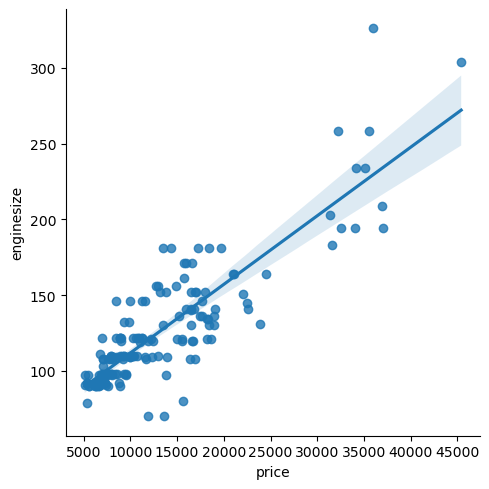

In [42]:
# Thử nghiệm kiểm tra và xử lý dữ liệu ngoại lai đối với các chỉ tiêu định lượng của mô hình car1
#Kiểm tra dữ liệu ngoại lai đối với 3 thuộc tính enginesize, curbweight và horsepower
#Trực quan bằng đồ thị
sns.lmplot(x='price', y="enginesize", data=train_set1)

<Axes: ylabel='curbweight'>

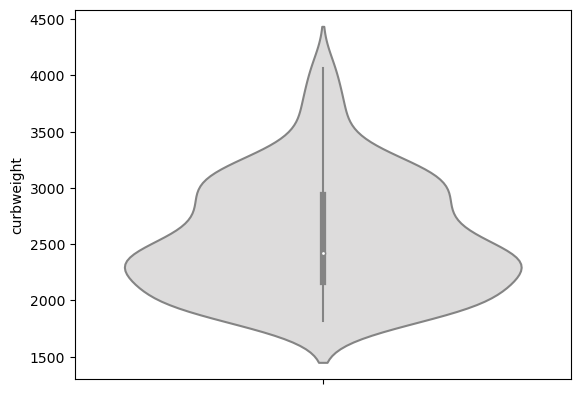

In [43]:
sns.violinplot(y=train_set1["curbweight"], palette="coolwarm")

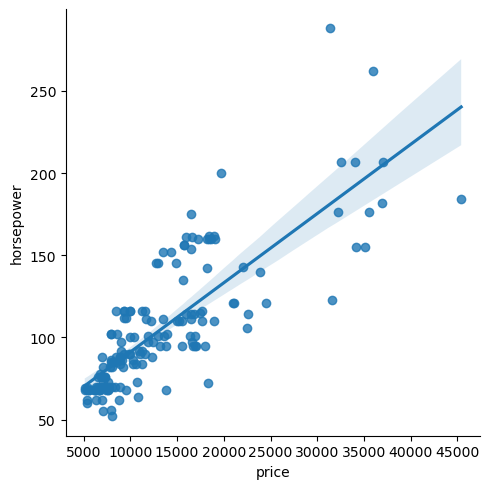

In [44]:
sns.lmplot(x='price', y="horsepower", data=train_set1)

In [45]:
#Xử lý dữ liệu ngoại lai bằng IQR

In [46]:
Q1 = train_set1.loc[:,('curbweight', 'enginesize','horsepower')] .quantile(0.2)
Q3 = train_set1.loc[:,('curbweight', 'enginesize','horsepower')].quantile(0.8)
IQR = Q3 - Q1
print(IQR)

curbweight    978.0
enginesize     54.4
horsepower     67.4
dtype: float64


In [47]:
#Xem xét tỷ lệ dữ liệu bị loại bỏ nếu xử lý dữ liệu ngoại lai
noise = train_set1[((train_set1.loc[:,('curbweight', 'enginesize','horsepower')] < (Q1 - 1.5 * IQR)) | (train_set1.loc[:,('curbweight', 'enginesize','horsepower')] > (Q3 + 1.5 *IQR))).any(axis=1)]
train_set1= train_set1[~((train_set1.loc[:,('curbweight', 'enginesize','horsepower')] < (Q1 - 1.5 * IQR)) | (train_set1.loc[:,('curbweight', 'enginesize','horsepower')] > (Q3 + 1.5 *IQR))).any(axis=1)]
print(f'tỷ lệ dữ liệu bị loại bỏ nếu sử dung IQR: {round(len(noise)/len(train_set1)*100,2)}')
train_set1.info()

tỷ lệ dữ liệu bị loại bỏ nếu sử dung IQR: 4.46
<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 66 to 102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drivewheel  157 non-null    int32  
 1   fuelsystem  157 non-null    int32  
 2   enginesize  157 non-null    int64  
 3   curbweight  157 non-null    int64  
 4   horsepower  157 non-null    int64  
 5   price       157 non-null    float64
dtypes: float64(1), int32(2), int64(3)
memory usage: 7.4 KB


In [48]:
Xtrain4=train_set1.iloc[:, :-1].values
Xtest4=test_set1.iloc[:, :-1].values
ytrain4=train_set1.iloc[:,-1]
ytest4=test_set1.iloc[:,-1]

In [49]:
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car4_model = LinearRegression()
car4_model.fit(Xtrain4, ytrain4.ravel())
print(f' Điểm dữ liệu train: {car4_model.score(Xtrain4, ytrain4)}')
print(f' Điểm dữ liệu test: {car4_model.score(Xtest4, ytest4)}')

 Điểm dữ liệu train: 0.7375756244363247
 Điểm dữ liệu test: 0.8068105889751405


# Kết luận:
## Các thuộc tính có ý nghĩa trong việc định giá xe hơi:
- Có 3 thuộc tính có mức tương quan lớn với giá xe hơi gồm: 'enginesize', 'curbweight', 'horsepower' mô hình xây dựng dựa trên 3 thuộc tính này cho điểm dự báo trên bộ dữ liệu test tương đối cao score = 0,82646
- Mô hình mở rộng dựa trên 5 thộc tính (4 thuộc tính định lượng và 1 thuộc tính định tính) gồm: 'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth' cho kết quả tốt nhất sau khi thử nghiệm. Điểm trên bộ dữ liệu train đạt 0.81898 và bộ dữ liệu test đạt 0.8349.
- Việc thay thế các thuộc tính khác có tương quan thấp hơn không làm tăng điểm cho mô hình. Việc loại bỏ dữ liệu ngoại lai khiến điểm của mô hình giảm sút đáng kể.
## Mối liên hệ giữa các thuộc tính với giá xe hơi:
- Mối quan hệ giữa 5 thuộc tính và giá xe trong mô hình car1: 
The linear model is: 
 price = -13153.1305233057 +      1167.3774033065897*drivewheel + -87.3631171953496*fuelsystem + 
      77.28686558971879*enginesize + 3.867642590341374*curbweight +      51.880107993888984*horsepower
      
- Mối quan hệ giữa 3 thuộc tính và giá xe trong mô hình car3:
The linear model is: 
 price = -13153.1305233057 +      1167.3774033065897*curbweight + -87.3631171953496*enginesize + 3.867642590341374*horsepower
